# Overview
The Dirty Cafe Sales dataset contains 10,000 rows of synthetic data representing sales transactions in a cafe. This dataset is intentionally "dirty," with missing values, inconsistent data, and errors introduced to provide a realistic scenario for data cleaning and exploratory data analysis (EDA). It can be used to practice cleaning techniques, data wrangling, and feature engineering.

# Columns Description
1. Transaction ID : A unique identifier for each transaction. Always present and unique
2. Item : The name of the item purchased. May contain missing or invalid values
3. Quantity : The quantity of the item purchased. May contain missing or invalid values.
4. Price per Unit : The price of a single unit of the item. May contain missing or invalid values.
5. Total spent : The total amount spent on the transaction. Calculated as Quantity x Price per Unit
6. Payment Method : The method of payment used. May contain missing or invalid values
7. Location : The location where the transaction occured. May contain missing or invalid values.
8. Transaction date : The date of the transaction. May contain missing or invalid values 

## Import Package and Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
os.getcwd()

'C:\\Users\\Dita Dervinta\\Documents\\Belajar\\Python Scripts\\Projects\\1. Cafe Sales'

In [3]:
sales_data = pd.read_csv("cafe_sales.csv")
sales_data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [4]:
display(sales_data.info(), 
        sales_data.duplicated().sum(), 
        sales_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


None

0

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [5]:
sales_data.nunique()

Transaction ID      10000
Item                   10
Quantity                7
Price Per Unit          8
Total Spent            19
Payment Method          5
Location                4
Transaction Date      367
dtype: int64

# Cleansing Data

## Fix the "Item" Columns

In [6]:
sales_data = sales_data.replace(["ERROR", "UNKNOWN"], np.nan)

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9031 non-null   object
 2   Quantity          9521 non-null   object
 3   Price Per Unit    9467 non-null   object
 4   Total Spent       9498 non-null   object
 5   Payment Method    6822 non-null   object
 6   Location          6039 non-null   object
 7   Transaction Date  9540 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [8]:
for i in sales_data.columns :
    print(f"{i} :")
    print(sales_data[i].unique())

print(sales_data.columns)

Transaction ID :
['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']
Item :
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']
Quantity :
['2' '4' '5' '3' '1' nan]
Price Per Unit :
['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan]
Total Spent :
['4.0' '12.0' nan '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' '2.0' '1.0' '7.5' '4.5' '1.5']
Payment Method :
['Credit Card' 'Cash' nan 'Digital Wallet']
Location :
['Takeaway' 'In-store' nan]
Transaction Date :
['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' nan '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-03-25' '2023-01-15' '2023-04-04'
 '2023-03-30' '2023-12-01' '2023-09-18' '2023-06-03' '2023-12-13'
 '2023-04-20' '2023-04-10' '2023-03-11' '2023-06-02' '2023-11-06'
 '2023-08-15' '2023-10-09' '2023-05-28' '2023-07-17' '2023-04-29'


In [9]:
sales_data["Quantity"] = pd.to_numeric(sales_data["Quantity"], errors = 'coerce')
sales_data["Price Per Unit"] = pd.to_numeric(sales_data["Price Per Unit"], errors = 'coerce')
sales_data["Total Spent"] = pd.to_numeric(sales_data["Total Spent"], errors = 'coerce')
sales_data["Transaction Date"] = pd.to_datetime(sales_data["Transaction Date"])

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [11]:
sales_data["Price Per Unit"] = sales_data["Price Per Unit"].fillna(sales_data["Total Spent"] / sales_data["Quantity"])

In [12]:
sales_data["Price Per Unit"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Price Per Unit
Non-Null Count  Dtype  
--------------  -----  
9962 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [13]:
conditions = [(sales_data["Item"].isna()) & (sales_data["Price Per Unit"] == 1.0),
              (sales_data["Item"].isna()) & (sales_data["Price Per Unit"] == 1.5),
              (sales_data["Item"].isna()) & (sales_data["Price Per Unit"] == 2.0),
              (sales_data["Item"].isna()) & (sales_data["Price Per Unit"] == 3.0),
              (sales_data["Item"].isna()) & (sales_data["Price Per Unit"] == 4.0),
              (sales_data["Item"].isna()) & (sales_data["Price Per Unit"] == 5.0)]

item = ["Cookie", "Tea", "Coffee", "Cake or Juice", "Smoothie or Sandwich", "Salad"]

sales_data ["Item"] = np.select(conditions, item, default = sales_data["Item"])

In [14]:
sales_data["Item"] = sales_data["Item"].fillna(sales_data["Item"].mode()[0])

In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9962 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


## Fix the "Quantity", "Total Spent", "Price Per Unit" Columns

In [16]:
sales_data["Quantity"] = sales_data["Quantity"].fillna(sales_data["Total Spent"] / sales_data["Price Per Unit"])
sales_data["Total Spent"] = sales_data["Total Spent"].fillna(sales_data["Quantity"] * sales_data["Price Per Unit"])

In [17]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          9962 non-null   float64       
 3   Price Per Unit    9962 non-null   float64       
 4   Total Spent       9960 non-null   float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [18]:
sales_data["Quantity"] = sales_data["Quantity"].fillna(sales_data["Quantity"].median())
sales_data["Price Per Unit"] = sales_data["Price Per Unit"].fillna(sales_data["Price Per Unit"].median())
sales_data["Total Spent"] = sales_data["Total Spent"].fillna(sales_data["Total Spent"].mean().round())

In [19]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    6822 non-null   object        
 6   Location          6039 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


## Fix the "Payment Method" and "Location" Columns

In [20]:
for col in ["Payment Method", "Location"] :
    sales_data[col] = sales_data[col].fillna(sales_data[col].mode()[0])

In [21]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


## Fix the "Transaction Date" Column

In [22]:
sales_data["Transaction Date"] = sales_data["Transaction Date"].fillna(method='ffill')

C:\Users\Dita Dervinta\AppData\Local\Temp\ipykernel_17504\325002054.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_data["Transaction Date"] = sales_data["Transaction Date"].fillna(method='ffill')


In [23]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


## Feature Engineering

Create new columns, such as Day of the Week or Transaction Month, for further analysis.

In [24]:
sales_data["Day of the Week"] = sales_data["Transaction Date"].dt.day_name()
sales_data["Transaction Month"] = sales_data["Transaction Date"].dt.month_name()
sales_data["Transaction Year"] = sales_data["Transaction Date"].dt.year

In [25]:
new_df = sales_data.sort_values("Transaction Date", ascending=True).reset_index(drop = True)

In [26]:
pd.reset_option("display.max_rows", None)

# Visualization

In [27]:
new_df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of the Week,Transaction Month,Transaction Year
0,TXN_8308672,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-01-01,Sunday,January,2023
1,TXN_8249251,Cake,3.0,3.0,9.0,Digital Wallet,In-store,2023-01-01,Sunday,January,2023
2,TXN_1581562,Coffee,2.0,2.0,4.0,Cash,In-store,2023-01-01,Sunday,January,2023
3,TXN_4292280,Cake,4.0,3.0,12.0,Cash,Takeaway,2023-01-01,Sunday,January,2023
4,TXN_7367474,Juice,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-01-01,Sunday,January,2023
...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN_1405498,Juice,2.0,3.0,6.0,Digital Wallet,Takeaway,2023-12-31,Sunday,December,2023
9996,TXN_4528664,Salad,3.0,5.0,15.0,Cash,In-store,2023-12-31,Sunday,December,2023
9997,TXN_2975443,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-12-31,Sunday,December,2023
9998,TXN_7108012,Tea,1.0,1.5,1.5,Digital Wallet,Takeaway,2023-12-31,Sunday,December,2023


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction ID     10000 non-null  object        
 1   Item               10000 non-null  object        
 2   Quantity           10000 non-null  float64       
 3   Price Per Unit     10000 non-null  float64       
 4   Total Spent        10000 non-null  float64       
 5   Payment Method     10000 non-null  object        
 6   Location           10000 non-null  object        
 7   Transaction Date   10000 non-null  datetime64[ns]
 8   Day of the Week    10000 non-null  object        
 9   Transaction Month  10000 non-null  object        
 10  Transaction Year   10000 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(6)
memory usage: 820.4+ KB


## 1. Overall Sales Trend

In [29]:
month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

new_df["Transaction Month"] = pd.Categorical (new_df["Transaction Month"],
                                              categories = month,
                                              ordered = True)

quantity_months = new_df.groupby("Transaction Month", as_index=False)["Quantity"].sum()
quantity_months

C:\Users\Dita Dervinta\AppData\Local\Temp\ipykernel_17504\796606535.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_months = new_df.groupby("Transaction Month", as_index=False)["Quantity"].sum()


,Transaction Month,Quantity
0,January,2558.0
1,February,2359.0
2,March,2611.0
3,April,2505.0
4,May,2449.0
5,June,2578.0
6,July,2463.0
7,August,2557.0
8,September,2449.0
9,October,2691.0


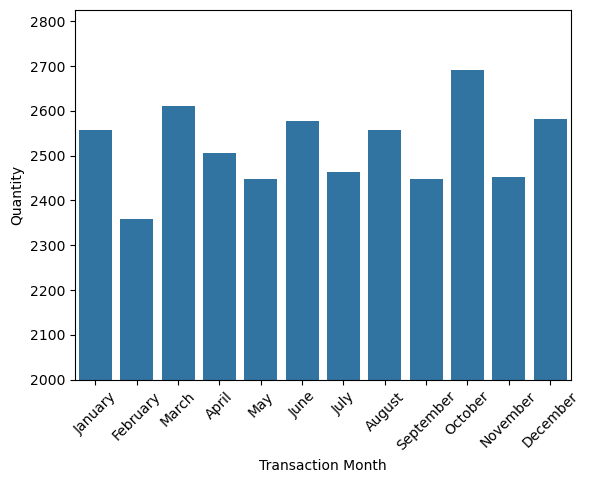

In [30]:
sns.barplot(quantity_months, x="Transaction Month", y="Quantity")
plt.xticks(rotation=45)
plt.ylim(2000)
plt.show()

In [31]:
tren = new_df.groupby("Transaction Date", as_index=True)["Total Spent"].sum()

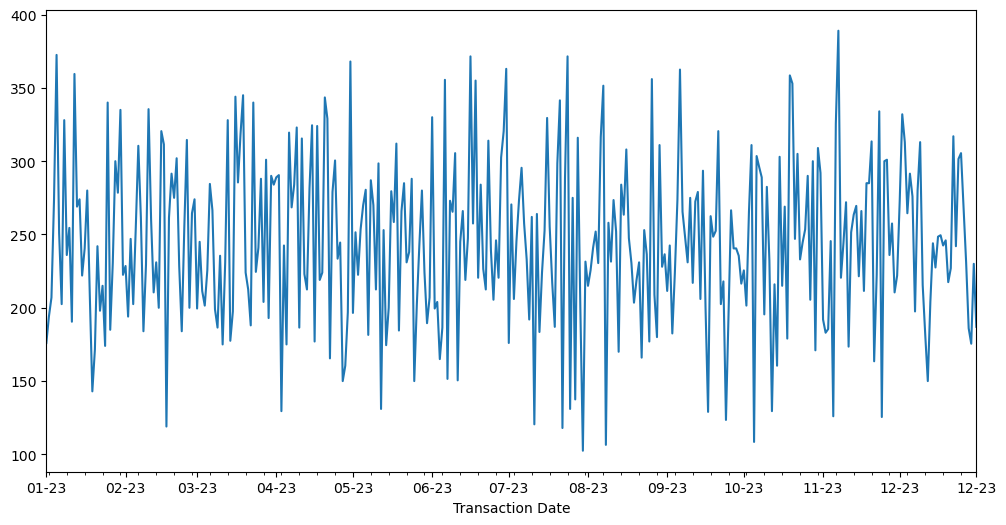

In [32]:
# Cara lain menggunakan matplotlib
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
tren.plot(kind="line")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
plt.show()

## 2. Sales Trend on Weekend Days

In [33]:
weekend = new_df[(new_df["Day of the Week"]=="Saturday") | (new_df["Day of the Week"]=="Sunday")]
weekend = weekend.groupby("Day of the Week", as_index=True)["Total Spent"].sum()

In [34]:
weekend

Day of the Week
Saturday    12805.5
Sunday      12814.0
Name: Total Spent, dtype: float64

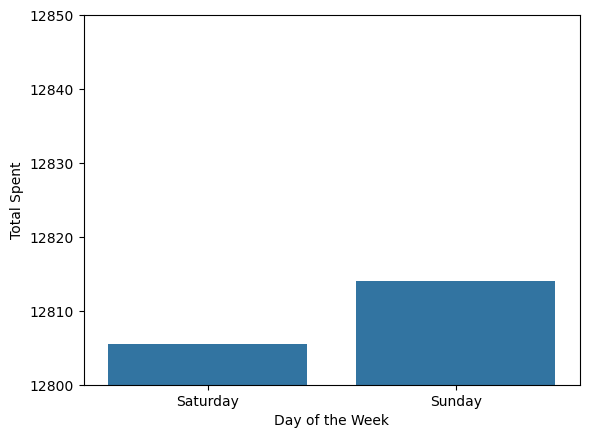

In [35]:
sns.barplot(weekend)
plt.ylim(12800,12850)
plt.show()

Total Spent
12805.5    50.0%
12814.0    50.0%
Name: proportion, dtype: object


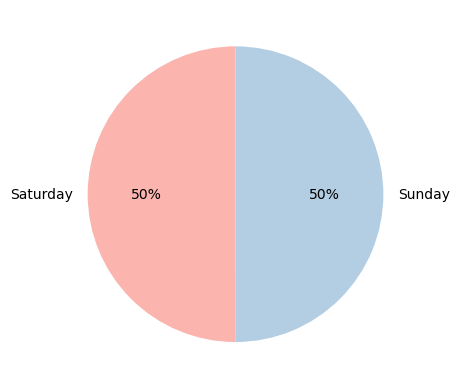

In [36]:
print((weekend.value_counts(normalize=True)*100).round(2).astype(str)+'%')
weekend.plot(kind='pie', autopct='%0.0f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.ylabel('')
plt.show()

## 3. Top Performing Products

In [37]:
products = new_df.groupby("Item").agg(
item_number = ("Item", "count"),
quantity_sum = ("Quantity", "sum"),
quantity_price = ("Total Spent", "sum"))

products = products.reset_index()

In [38]:
products

,Item,item_number,quantity_sum,quantity_price
0,Cake,1139,3474.0,10413.0
1,Cake or Juice,247,757.0,2271.0
2,Coffee,1297,3939.0,7933.0
3,Cookie,1213,3609.0,3634.0
4,Juice,1171,3514.0,10545.0
5,Salad,1272,3827.0,19097.0
6,Sandwich,1131,3439.0,13736.0
7,Smoothie,1096,3342.0,13365.0
8,Smoothie or Sandwich,227,704.0,2816.0
9,Tea,1207,3650.0,5502.0


In [39]:
top10_item = products.nlargest(10,"quantity_sum")
top10_price = products.nlargest(10,"quantity_price")

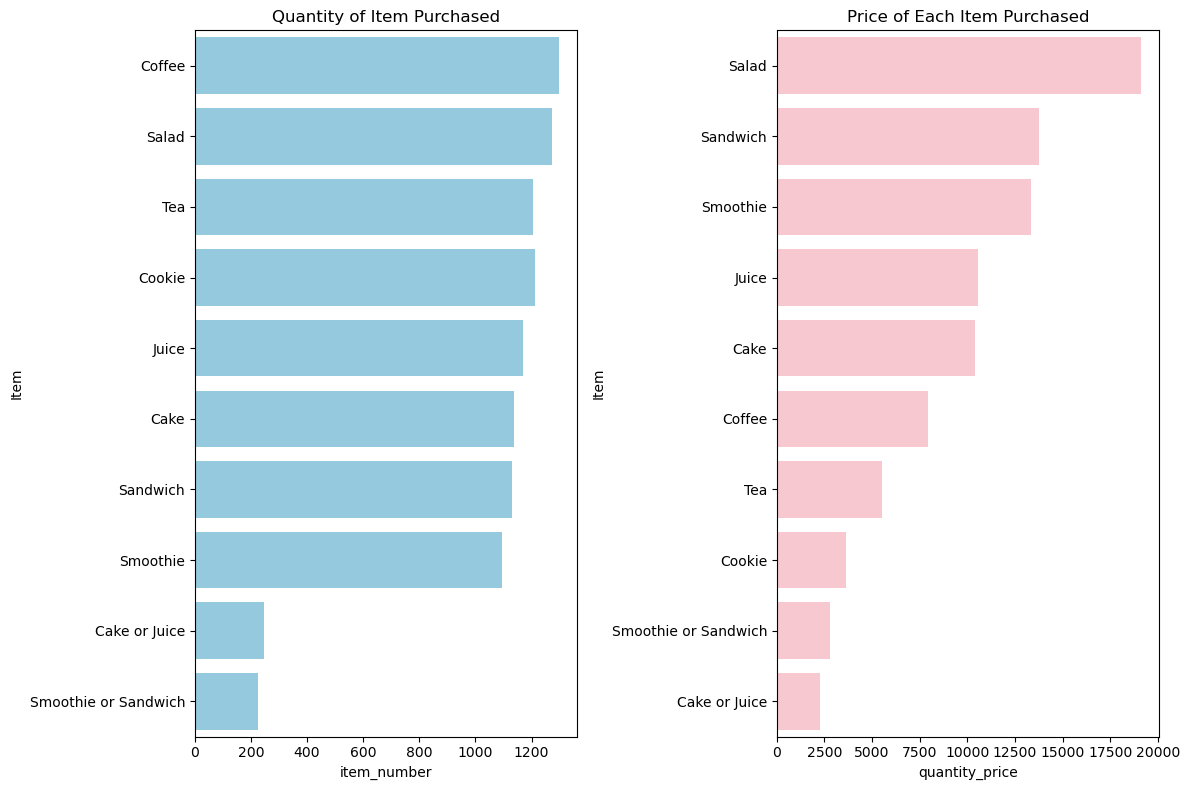

In [40]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
sns.barplot(top10_item, x="item_number", y="Item", color='skyblue')
plt.title("Quantity of Item Purchased")

plt.subplot(1, 2, 2)
sns.barplot(top10_price, x="quantity_price", y="Item", color='pink')
plt.title("Price of Each Item Purchased")

plt.tight_layout()  # Agar layout tidak tumpang tindih
plt.show()

## 4. Payment Method Analysis 

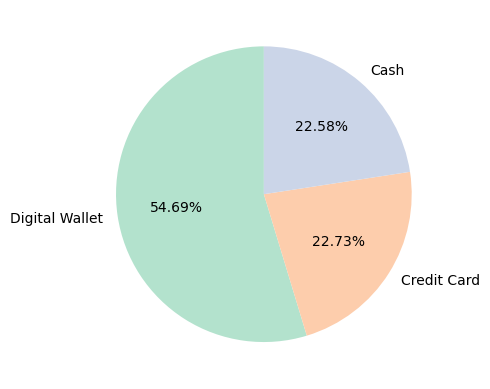

In [41]:
payment = (new_df["Payment Method"].value_counts(normalize=True)*100)
payment.plot(kind='pie', autopct='%2.2f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.ylabel('')
plt.show()

## 5. Item Recommendation

Rekomendasi item yang sering dibeli bersamaan (Market Basket Analysis)
dengan **Apriori Algorithm**

In [42]:
new_df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Day of the Week,Transaction Month,Transaction Year
0,TXN_8308672,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-01-01,Sunday,January,2023
1,TXN_8249251,Cake,3.0,3.0,9.0,Digital Wallet,In-store,2023-01-01,Sunday,January,2023
2,TXN_1581562,Coffee,2.0,2.0,4.0,Cash,In-store,2023-01-01,Sunday,January,2023
3,TXN_4292280,Cake,4.0,3.0,12.0,Cash,Takeaway,2023-01-01,Sunday,January,2023
4,TXN_7367474,Juice,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-01-01,Sunday,January,2023
...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN_1405498,Juice,2.0,3.0,6.0,Digital Wallet,Takeaway,2023-12-31,Sunday,December,2023
9996,TXN_4528664,Salad,3.0,5.0,15.0,Cash,In-store,2023-12-31,Sunday,December,2023
9997,TXN_2975443,Salad,5.0,5.0,25.0,Digital Wallet,Takeaway,2023-12-31,Sunday,December,2023
9998,TXN_7108012,Tea,1.0,1.5,1.5,Digital Wallet,Takeaway,2023-12-31,Sunday,December,2023


In [43]:
trolly = pd.pivot_table(new_df,
              index = "Transaction ID",
              columns = "Item", 
              values = "Quantity",
              aggfunc = "nunique", 
              fill_value = 0)

display(trolly, trolly.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, TXN_1000555 to TXN_9999124
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cake                  10000 non-null  int64
 1   Cake or Juice         10000 non-null  int64
 2   Coffee                10000 non-null  int64
 3   Cookie                10000 non-null  int64
 4   Juice                 10000 non-null  int64
 5   Salad                 10000 non-null  int64
 6   Sandwich              10000 non-null  int64
 7   Smoothie              10000 non-null  int64
 8   Smoothie or Sandwich  10000 non-null  int64
 9   Tea                   10000 non-null  int64
dtypes: int64(10)
memory usage: 859.4+ KB


Item,Cake,Cake or Juice,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Smoothie or Sandwich,Tea
Transaction ID,,,,,,,,,,
TXN_1000555,0,0,0,0,0,0,0,0,0,1
TXN_1001832,0,0,0,0,0,1,0,0,0,0
TXN_1002457,0,0,0,1,0,0,0,0,0,0
TXN_1003246,0,0,0,0,1,0,0,0,0,0
TXN_1004184,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
TXN_9996968,0,0,0,0,0,0,1,0,0,0
TXN_9997263,0,0,0,1,0,0,0,0,0,0
TXN_9997620,0,0,0,1,0,0,0,0,0,0


None

In [44]:
def encode(x) :
    if x == 0 :
        return False
    if x > 0 :
        return True
    
trolly_encode = trolly.applymap(encode)
display(trolly_encode, trolly_encode.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, TXN_1000555 to TXN_9999124
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Cake                  10000 non-null  bool 
 1   Cake or Juice         10000 non-null  bool 
 2   Coffee                10000 non-null  bool 
 3   Cookie                10000 non-null  bool 
 4   Juice                 10000 non-null  bool 
 5   Salad                 10000 non-null  bool 
 6   Sandwich              10000 non-null  bool 
 7   Smoothie              10000 non-null  bool 
 8   Smoothie or Sandwich  10000 non-null  bool 
 9   Tea                   10000 non-null  bool 
dtypes: bool(10)
memory usage: 175.8+ KB


C:\Users\Dita Dervinta\AppData\Local\Temp\ipykernel_17504\435810508.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  trolly_encode = trolly.applymap(encode)


Item,Cake,Cake or Juice,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Smoothie or Sandwich,Tea
Transaction ID,,,,,,,,,,
TXN_1000555,False,False,False,False,False,False,False,False,False,True
TXN_1001832,False,False,False,False,False,True,False,False,False,False
TXN_1002457,False,False,False,True,False,False,False,False,False,False
TXN_1003246,False,False,False,False,True,False,False,False,False,False
TXN_1004184,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
TXN_9996968,False,False,False,False,False,False,True,False,False,False
TXN_9997263,False,False,False,True,False,False,False,False,False,False
TXN_9997620,False,False,False,True,False,False,False,False,False,False


None

In [45]:
from mlxtend.frequent_patterns import apriori

frequent_item = apriori(trolly_encode, min_support = .01, use_colnames = True).sort_values("support", ascending = False).reset_index(drop=True)
frequent_item["product_count"] = frequent_item["itemsets"].apply(lambda x : len(x))
frequent_item

,support,itemsets,product_count
0,0.1297,(Coffee),1
1,0.1272,(Salad),1
2,0.1213,(Cookie),1
3,0.1207,(Tea),1
4,0.1171,(Juice),1
5,0.1139,(Cake),1
6,0.1131,(Sandwich),1
7,0.1096,(Smoothie),1
8,0.0247,(Cake or Juice),1
9,0.0227,(Smoothie or Sandwich),1
